## describe your problem

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

**TRIPLE CHECK WHERE YOUR FILES ARE DOWNLOADED AND UNZIPPED. PLEASE REVIEW VIDEO BEFORE POSTING TO QA FORUMS.**

---------------------------------

## loading new data

- working with real image dataset to classify the malaria disease ( infected or uninfected)
- Dataset contains 2 folders infected - uninfected
- and around 30,000 images 

In [2]:
# visualize the dataset first to see some images 
import os
data_path = "C:\\Users\\eslam\\0-MY WORK\\Datasets\\cell_images\\"

os.listdir(data_path)

['test', 'train']

In [3]:
# get the test and training paths
test_path = data_path+"test\\"
train_path = data_path+"train\\"

In [4]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
# train paths 
uninfected_train = train_path + "uninfected\\"
infected_train = train_path + "parasitized\\"

# test paths 
uninfected_test = test_path + "uninfected\\"
infected_test = test_path + "parasitized\\"

In [7]:
image_cell_path = os.listdir(uninfected_train)[0]
image_cell_path

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

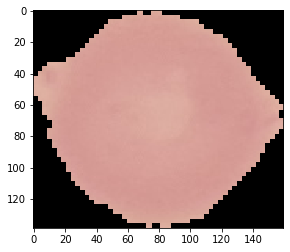

In [8]:
# display uninfected image 
uninf_img = plt.imread(uninfected_train+image_cell_path)
plt.imshow(uninf_img)

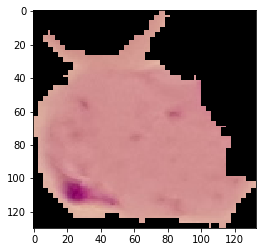

In [9]:
# display an infected image 
infec_cell_name = os.listdir(infected_train)[100]
infec_cell = plt.imread(infected_train+infec_cell_name)

plt.imshow(infec_cell)

In [ ]:
# visualize some images together 
# img_names = os.listdir(infected_train_path)[0:10]


# plt.figure(figsize = (20, 10))

# for i, name in enumerate(img_names):
#     image_name = os.path.join(infected_train_path, name)
#     image = plt.imread(image_name)
#     plt.subplot(2,5 , i+1)
#     plt.imshow(image)
#     plt.axis("off")

In [ ]:
# # visualize more images
# images = os.listdir(infected_test_path)[:50]

# plt.figure(figsize = (20,12))

# for i , name in enumerate(images):
#     image_name = os.path.join(infected_test_path, name)
#     image = plt.imread(image_name)
#     plt.subplot(5, 10, i+1)
#     plt.imshow(image)
#     plt.axis("off")
#     plt.title(str(i+1))

In [10]:
# what about the shapes of the images


In [11]:
infec_cell.shape

(130, 133, 3)

**another imortant step is to know how many images you have in each file**
- count the images in each file

In [12]:
train_length = len(os.listdir(uninfected_train)) + len(os.listdir(infected_train))

print("number of training images is : {} images".format(train_length))

number of training images is : 24960 images


In [13]:
test_length = len(os.listdir(uninfected_test)) + len(os.listdir(infected_test))

print("the number of testing images is : {} images".format(test_length))

the number of testing images is : 2600 images


In [14]:
# total number of images \
train_length + test_length

27560

In [ ]:
# # calculate number of training samples
# train_length = 0

# for folder in os.listdir(train_path):
#     folder_path = os.path.join(train_path , folder)
#     train_length += len(os.listdir(folder_path))
    
# print(f'number of training examples is {train_length} images')



# # calculate the number of testing images 
# test_length = 0

# for folder in os.listdir(test_path):
#     folder_path = os.path.join(test_path , folder)
#     test_length +=  len(os.listdir(folder_path))
    
# print(f'number of test samples is {test_length} images')


- what about the dimensions of images 
- we have different dimensions here but we have to make it the same dimension so the CNN can learn it and understand it correctly 
- we can take a random dimension but the best option is to know the average dimensions of all images

In [15]:
weights = []
heights = []

# loop over the names and get the dimension of each image
for image_name in os.listdir(uninfected_test):
    img = plt.imread(uninfected_test+image_name)
    
    weights.append(img.shape[0])
    heights.append(img.shape[1])

In [16]:
print("mean of wights is {}".format(np.mean(weights)))
print("mean of heights is {}".format(np.mean(heights)))

mean of wights is 130.92538461538462
mean of heights is 130.75


- we will resize all the images to `(130,130,3)` rgb images

## Preparing the data for the model

image manupulation and data augmentation using `keras.ImageDataGenerator`

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range= 20 , width_shift_range=0.1 , 
                              height_shift_range= 0.1 , zoom_range=0.1 , 
                              horizontal_flip= True , shear_range= 0.1 , 
                              fill_mode= "nearest" , 
                              #rescale = 1/255
                              )



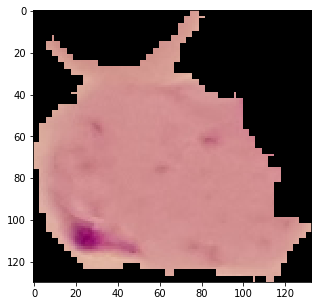

In [20]:
plt.figure(figsize = (7,5))
plt.imshow(infec_cell)

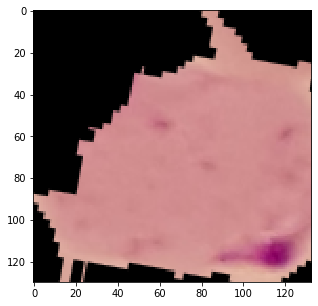

In [21]:
# random transformation
plt.figure(figsize = (7,5))

plt.imshow(image_gen.random_transform(infec_cell))

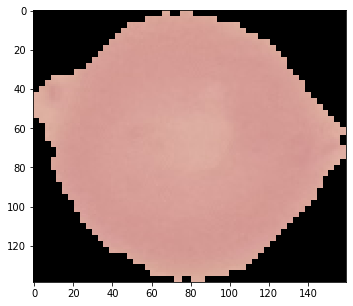

In [22]:
# again try the random transformation for random images 
plt.figure(figsize = (7,5))
plt.imshow(uninf_img)

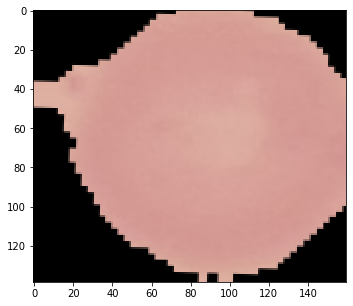

In [23]:
plt.figure(figsize = (7,5))
plt.imshow(image_gen.random_transform(uninf_img))

- generating many manupulated images from a directory and to use `.flow_from_directory` e should organize the images in subdirectories othrwise it will not work

In [24]:
# generate manipulated images for training data 
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [25]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the model 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation

In [30]:
image_shape = (130,130,3)

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)            

## Early stopping

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [36]:
batch_size = 16 

In [37]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [38]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [39]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [40]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 637s 408ms/step - loss: 7.7114 - accuracy: 0.5000 - val_loss: 7.7361 - val_accuracy: 0.5000
Epoch 2/20
1560/1560 [==============================] - 660s 423ms/step - loss: 7.7126 - accuracy: 0.5000 - val_loss: 7.7361 - val_accuracy: 0.5000
Epoch 3/20
1560/1560 [==============================] - 2618s 2s/step - loss: 7.7126 - accuracy: 0.5000 - val_loss: 7.7361 - val_accuracy: 0.5000


In [41]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,7.711609,0.5,7.736132,0.5
1,7.712474,0.5,7.736132,0.5
2,7.712474,0.5,7.736132,0.5


## model evaluation

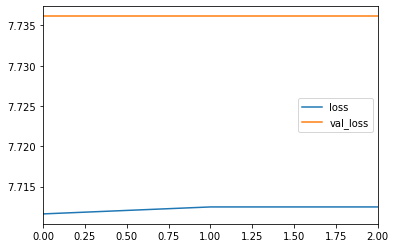

In [42]:
losses[['loss','val_loss']].plot()

In [45]:
print(model.metrics_names)
model.evaluate_generator(test_image_gen)

['loss', 'accuracy']


[7.736132241465563, 0.5]

In [46]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [47]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [48]:
predictions = pred_probabilities > 0.5

In [49]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1300
           1       0.00      0.00      0.00      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



c:\users\eslam\anaconda3\envs\mytfenv\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [51]:

confusion_matrix(test_image_gen.classes,predictions)

array([[1300,    0],
       [1300,    0]], dtype=int64)

## predicting image

In [84]:
infec_cell = (infected_train+infec_cell_name)
infec_cell

'C:\\Users\\eslam\\0-MY WORK\\Datasets\\cell_images\\train\\parasitized\\C101P62ThinF_IMG_20150918_151239_cell_77.png'

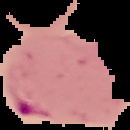

In [85]:
my_image = image.load_img(infec_cell,target_size=image_shape)
my_image

In [86]:
type(my_image)

PIL.Image.Image

In [87]:
my_image = image.img_to_array(my_image)

my_image.shape

(130, 130, 3)

In [89]:
my_image = np.expand_dims(my_image, axis=0)

my_image.shape

(1, 130, 130, 3)

In [90]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [91]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}